# Practice Exercise: Cleaning data & Transforming columns/features

## Context:
- The data is based on real anonymized Czech bank transactions and account info.
- We'll be focusing on practicing the data cleaning, columns transformations, and other techniques that we've learned in the course. 
- But here is the original task description of the dataset publishers:

*The bank wants to improve their services. For instance, the bank managers have only vague idea, who is a good client (whom to offer some additional services)   and who is a bad client (whom to watch carefully to minimize the bank losses). Fortunately, the bank stores data about their clients, the accounts (transactions within several months), the loans already granted, the credit cards issued. The bank managers hope to improve their understanding of customers and seek specific actions to improve services.*

## Dataset Description:

We'll work on three datasets (in three separate csv files):

  - **account**: each record describes static characteristics of an account
  - **transaction**: each record describes one transaction on an account
  - **district**: each record describes districtgraphic characteristics of a district
  
In reality, the organizations like banks often have data stored in multiple datasets. Assume we want to study the transactional level data, we'll need to combine these three datasets together to have transactions data with account and district data.

## Objective: 
   - Examine/clean the individual dataset
   - Combine them into a single dataset, which is subject to more cleaning
   - Create new columns based on existing columns

By the end, the new dataset is ready for more analysis.

### 1. Import the libraries

In [1]:
import pandas as pd
import numpy as np

### 2. Import the data from three csv files as DataFrames `account`, `district`, `trans`
Hint: 
- the `read_csv` function can automatically infer and load zip file, read its documentation of parameter `compression` if you are interested in details
- you may ignore the warning when reading the `trans.csv.zip` file. It is optional to follow the warning instructions to remove it.

In [2]:
account=pd.read_csv('account.csv')
district=pd.read_csv('district.csv')
trans=pd.read_csv('trans.csv')

c:\Users\keseteberhand\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### 3. Look at the info summary, head of each DataFrame

In [3]:
account.head()

,account_id,district_id,frequency,account_open_date,client_id
0,576,55,MONTHLY STATEMENTS,1993-01-01,692
1,3818,74,MONTHLY STATEMENTS,1993-01-01,4601
2,704,55,MONTHLY STATEMENTS,1993-01-01,844
3,2378,16,MONTHLY STATEMENTS,1993-01-01,2873
4,2632,24,MONTHLY STATEMENTS,1993-01-02,3177


In [4]:
district.head()

,district_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes
0,1,Hl.m. Praha,Prague,1204953,12541.0,0.43,99107.0
1,2,Benesov,central Bohemia,88884,NaN,NaN,2674.0
2,3,Beroun,central Bohemia,75232,8980.0,2.21,2813.0
3,4,Kladno,central Bohemia,149893,9753.0,5.05,NaN
4,5,Kolin,central Bohemia,95616,9307.0,4.43,NaN


In [5]:
trans.head()

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account
0,695247,2378,1993-01-01,CREDIT,CREDIT IN CASH,700.0,700.0,NaN,NaN,NaN
1,171812,576,1993-01-01,CREDIT,CREDIT IN CASH,900.0,900.0,NaN,NaN,NaN
2,207264,704,1993-01-01,CREDIT,CREDIT IN CASH,1000.0,1000.0,NaN,NaN,NaN
3,1117247,3818,1993-01-01,CREDIT,CREDIT IN CASH,600.0,600.0,NaN,NaN,NaN
4,579373,1972,1993-01-02,CREDIT,CREDIT IN CASH,400.0,400.0,NaN,NaN,NaN


### 4. Check for the unique values and their counts in each column for the three DataFrames

In [6]:
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   account_id         4500 non-null   int64 
 1   district_id        4500 non-null   int64 
 2   frequency          4500 non-null   object
 3   account_open_date  4500 non-null   object
 4   client_id          4500 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 175.9+ KB


In [7]:
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   district_id           76 non-null     int64  
 1   district_name         76 non-null     object 
 2   region                76 non-null     object 
 3   population            76 non-null     int64  
 4   average_salary        66 non-null     float64
 5   unemployment_rate     66 non-null     float64
 6   num_committed_crimes  67 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 4.3+ KB


In [8]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   trans_id         1056320 non-null  int64  
 1   account_id       1056320 non-null  int64  
 2   date             1056320 non-null  object 
 3   type             1056320 non-null  object 
 4   operation_type   873206 non-null   object 
 5   amount           1056320 non-null  float64
 6   balance          1056320 non-null  float64
 7   description      574439 non-null   object 
 8   partner_bank     273508 non-null   object 
 9   partner_account  295389 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 80.6+ MB


### 5. Check for duplicates in the three DataFrames

In [9]:
account.nunique()

account_id           4500
district_id            77
frequency               3
account_open_date    1535
client_id            4500
dtype: int64

In [10]:
account[account.duplicated()]

,account_id,district_id,frequency,account_open_date,client_id


In [11]:
district.nunique()

district_id             76
district_name           76
region                   8
population              76
average_salary          65
unemployment_rate       63
num_committed_crimes    66
dtype: int64

In [12]:
district[district.duplicated()]

,district_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes


In [13]:
trans.nunique()

trans_id           1056320
account_id            4500
date                  2191
type                     2
operation_type           5
amount               40400
balance             542739
description              8
partner_bank            13
partner_account       7665
dtype: int64

In [14]:
trans[trans.duplicated()]

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account


### 6. Convert column `account_open_date` in `account` and column `date` in `trans` into datetime dtypes

In [15]:
account["account_open_date"]=pd.to_datetime(account["account_open_date"], format='%Y-%m-%d')

In [16]:
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   account_id         4500 non-null   int64         
 1   district_id        4500 non-null   int64         
 2   frequency          4500 non-null   object        
 3   account_open_date  4500 non-null   datetime64[ns]
 4   client_id          4500 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 175.9+ KB


In [17]:
trans["trans_date"]=pd.to_datetime(trans["date"], format='%Y-%m-%d')

In [18]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   trans_id         1056320 non-null  int64         
 1   account_id       1056320 non-null  int64         
 2   date             1056320 non-null  object        
 3   type             1056320 non-null  object        
 4   operation_type   873206 non-null   object        
 5   amount           1056320 non-null  float64       
 6   balance          1056320 non-null  float64       
 7   description      574439 non-null   object        
 8   partner_bank     273508 non-null   object        
 9   partner_account  295389 non-null   float64       
 10  trans_date       1056320 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 88.7+ MB


### 7. Convert the columns `region` and `district_name` in `district` to all uppercase

In [19]:
district['region'] = district['region'].str.upper()
list[set(district['region'])]

list[{'CENTRAL BOHEMIA', 'SOUTH BOHEMIA', 'PRAGUE', 'SOUTH MORAVIA', 'NORTH BOHEMIA', 'NORTH MORAVIA', 'EAST BOHEMIA', 'WEST BOHEMIA'}]

In [20]:
district['district_name'] = district['district_name'].str.upper()
list[set(district['district_name'])]

list[{'KARVINA', 'KUTNA HORA', 'MOST', 'KLADNO', 'STRAKONICE', 'PLZEN - MESTO', 'PISEK', 'PARDUBICE', 'BLANSKO', 'ZNOJMO', 'DOMAZLICE', 'PELHRIMOV', 'BRNO - VENKOV', 'JABLONEC N. NISOU', 'BEROUN', 'LITOMERICE', 'PLZEN - SEVER', 'PRIBRAM', 'SVITAVY', 'BRUNTAL', 'HL.M. PRAHA', 'TEPLICE', 'USTI NAD ORLICI', 'HRADEC KRALOVE', 'SOKOLOV', 'CESKA LIPA', 'CHRUDIM', 'NOVY JICIN', 'KARLOVY VARY', 'OLOMOUC', 'SUMPERK', 'KLATOVY', 'CESKE BUDEJOVICE', 'TACHOV', 'HAVLICKUV BROD', 'FRYDEK - MISTEK', 'PLZEN - JIH', 'RYCHNOV NAD KNEZNOU', 'TREBIC', 'ZDAR NAD SAZAVOU', 'TABOR', 'ZLIN', 'LOUNY', 'KOLIN', 'SEMILY', 'BENESOV', 'RAKOVNIK', 'LIBEREC', 'HODONIN', 'VYSKOV', 'ROKYCANY', 'USTI NAD LABEM', 'JIHLAVA', 'PREROV', 'JINDRICHUV HRADEC', 'CESKY KRUMLOV', 'PRACHATICE', 'JICIN', 'BRNO - MESTO', 'JESENIK', 'OPAVA', 'CHOMUTOV', 'PROSTEJOV', 'OSTRAVA - MESTO', 'KROMERIZ', 'MLADA BOLESLAV', 'DECIN', 'MELNIK', 'PRAHA - ZAPAD', 'PRAHA - VYCHOD', 'NACHOD', 'TRUTNOV', 'CHEB', 'UHERSKE HRADISTE', 'BRECLAV', 'NYMBU

### 8. Check for missing data by columns in `account` using the `isna` method

In [21]:
account.isna().sum()

account_id           0
district_id          0
frequency            0
account_open_date    0
client_id            0
dtype: int64

### 9. Check for missing data by columns in `district` using the `isna` method

In [22]:
# Missing values
district.isna().sum()

district_id              0
district_name            0
region                   0
population               0
average_salary          10
unemployment_rate       10
num_committed_crimes     9
dtype: int64

In [23]:
# % Missing values
district.isna().mean()*100

district_id              0.000000
district_name            0.000000
region                   0.000000
population               0.000000
average_salary          13.157895
unemployment_rate       13.157895
num_committed_crimes    11.842105
dtype: float64

`district` has numeric features that could have relationships with each other. Let's use iterative imputation on them.

#### Use `IterativeImputer` in `sklearn` to impute based on columns `population`, `average_salary`, `unemployment_rate`, `num_committed_crimes`

##### Import libraries

In [24]:
# Import IterativeImputer from sklearn.impute

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

##### Build a list of columns that will be used for imputation, which are `population`, `average_salary`, `unemployment_rate`, `num_committed_crimes`
These are the columns that might be related to each other 

In [25]:
#Define a subset of the dataset
numeric_cols = district.filter(['population', 'average_salary', 'unemployment_rate', 'num_committed_crimes'], axis=1).copy()
numeric_cols

,population,average_salary,unemployment_rate,num_committed_crimes
0,1204953,12541.0,0.43,99107.0
1,88884,NaN,NaN,2674.0
2,75232,8980.0,2.21,2813.0
3,149893,9753.0,5.05,NaN
4,95616,9307.0,4.43,NaN
...,...,...,...,...
71,226122,NaN,4.79,9208.0
72,182027,8746.0,3.74,4433.0
73,323870,10673.0,5.44,18347.0
74,138032,8819.0,5.66,4505.0


##### Create `IterativeImputer` object and set its `min_value` and `max_value` parameters to be the minumum and maximum of corresponding columns

In [26]:
iter_imp = IterativeImputer(min_value=numeric_cols.min(), max_value=numeric_cols.max())

##### Apply the imputer to fit and transform the columns to an imputed NumPy array

In [27]:
imputed_cols = iter_imp.fit_transform(numeric_cols)

##### Assign the imputed array back to the original DataFrame's columns

In [28]:
cols_to_impute=['population','average_salary','unemployment_rate','num_committed_crimes']
district[cols_to_impute] = imputed_cols

##### Double check that the columns are imputed

In [29]:
# Missing values after imputation
district.isna().sum()

district_id             0
district_name           0
region                  0
population              0
average_salary          0
unemployment_rate       0
num_committed_crimes    0
dtype: int64

### 10. Check for missing data by columns in `trans` using the `isna` method

In [30]:
# Missing values
trans.isna().sum()

trans_id                0
account_id              0
date                    0
type                    0
operation_type     183114
amount                  0
balance                 0
description        481881
partner_bank       782812
partner_account    760931
trans_date              0
dtype: int64

#### Divide the columns into numeric columns and categorical columns, then use the `fillna` method to fill numeric columns with -999, fill categorical columns with 'UNKNOWN'

In [31]:
# Identify data types
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   trans_id         1056320 non-null  int64         
 1   account_id       1056320 non-null  int64         
 2   date             1056320 non-null  object        
 3   type             1056320 non-null  object        
 4   operation_type   873206 non-null   object        
 5   amount           1056320 non-null  float64       
 6   balance          1056320 non-null  float64       
 7   description      574439 non-null   object        
 8   partner_bank     273508 non-null   object        
 9   partner_account  295389 non-null   float64       
 10  trans_date       1056320 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 88.7+ MB


In [32]:
# Differentiating columns into numerical and categorical data
trans_numeric_cols=['operation_type']
trans_categorical_cols=['description','partner_bank','partner_account']


In [33]:
trans[trans_numeric_cols]=trans[trans_numeric_cols].fillna(-999)
trans[trans_categorical_cols]=trans[trans_categorical_cols].fillna('Unknown')
trans.isna().sum()

trans_id           0
account_id         0
date               0
type               0
operation_type     0
amount             0
balance            0
description        0
partner_bank       0
partner_account    0
trans_date         0
dtype: int64

### 11. Check for outliers in `district` using the `describe` method, then look at the histograms of the suspicious columns

In [34]:
district.describe()

,district_id,population,average_salary,unemployment_rate,num_committed_crimes
count,76.000000,7.600000e+01,76.000000,76.000000,76.000000
mean,38.500000,1.336920e+05,8983.707247,3.864003,5054.492038
std,22.083176,1.378127e+05,740.959314,1.721597,11392.279917
min,1.000000,4.282100e+04,8110.000000,0.430000,888.000000
25%,19.750000,8.472500e+04,8533.750000,2.650000,1918.454646
50%,38.500000,1.083910e+05,8792.984750,3.761936,2864.000000
75%,57.250000,1.382770e+05,9280.750000,4.570000,4562.413240
max,76.000000,1.204953e+06,12541.000000,9.400000,99107.000000


#### Explore the outliers in the dataset

In [35]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'average_salary'}>],
       [<AxesSubplot:title={'center':'unemployment_rate'}>,
        <AxesSubplot:title={'center':'num_committed_crimes'}>]],
      dtype=object)

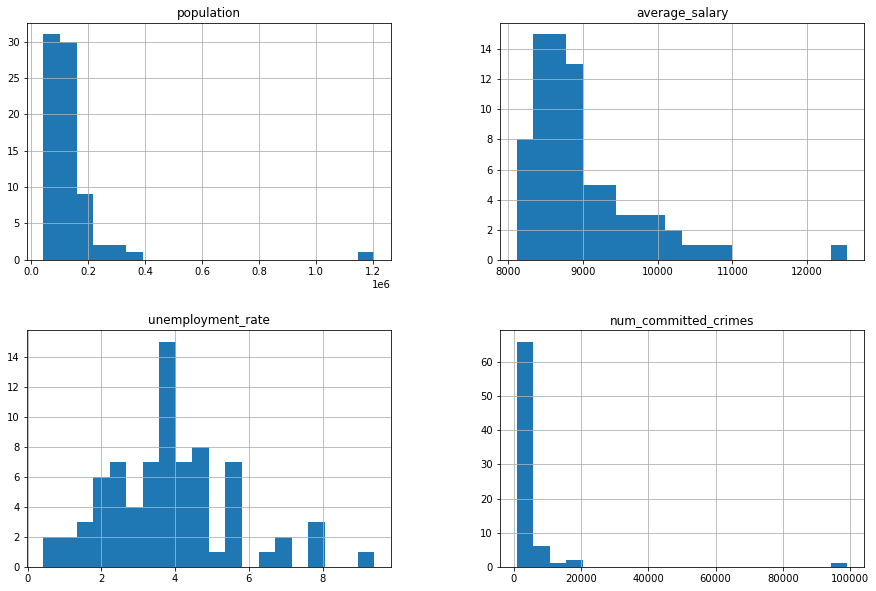

In [36]:
district[['population', 'average_salary', 'unemployment_rate', 'num_committed_crimes']].hist(bins=20, figsize=(15, 10))

### 12. Check for outliers in `trans` using the `describe` method, then look at the histograms of the suspicious columns

In [37]:
trans.describe()

,trans_id,account_id,amount,balance
count,1.056320e+06,1.056320e+06,1.056320e+06,1.056320e+06
mean,1.335311e+06,2.936867e+03,5.924146e+03,3.851833e+04
std,1.227487e+06,2.477345e+03,9.522735e+03,2.211787e+04
min,1.000000e+00,1.000000e+00,0.000000e+00,-4.112570e+04
25%,4.302628e+05,1.204000e+03,1.359000e+02,2.240250e+04
50%,8.585065e+05,2.434000e+03,2.100000e+03,3.314340e+04
75%,2.060979e+06,3.660000e+03,6.800000e+03,4.960362e+04
max,3.682987e+06,1.138200e+04,8.740000e+04,2.096370e+05


#### Explore the outliers in the dataset

array([[<AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'balance'}>]], dtype=object)

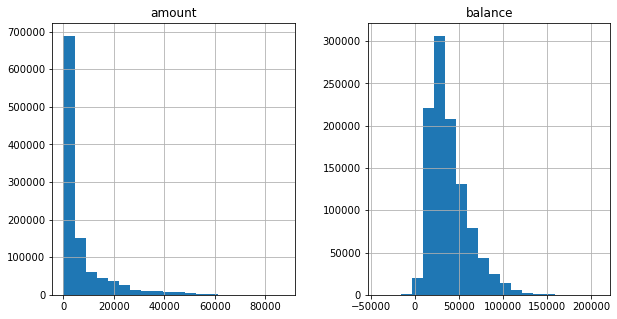

In [38]:
trans[['amount','balance']].hist(bins=20,figsize=(10,5))

The DataFrame `account` doesn't have any columns that could have outliers, so we are not exploring it.

### 13. Merge (left join) `account` and `district` into a new DataFrame called `account_district` using their common columns

In [39]:
account2=pd.read_csv('account.csv')
district2=pd.read_csv('district.csv')
account_district = pd.merge(account2, district2, on="district_id", how='left')

### 14. Check the information summary of `account_district`, any missing data?

In [40]:
account_district.isna().sum()

account_id                0
district_id               0
frequency                 0
account_open_date         0
client_id                 0
district_name            40
region                   40
population               40
average_salary          626
unemployment_rate       557
num_committed_crimes    515
dtype: int64

#### Look at the rows with missing data in `account_district`

In [41]:
account_district.isnull() 

,account_id,district_id,frequency,account_open_date,client_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes
0,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4495,False,False,False,False,False,False,False,False,True,False,False
4496,False,False,False,False,False,False,False,False,False,False,False
4497,False,False,False,False,False,False,False,False,True,False,False
4498,False,False,False,False,False,False,False,False,False,False,False


In [42]:
account_district[account_district['average_salary'].isnull()]
# do the same to see records with missing values for unemployment_rate, and num_committed_crimes

,account_id,district_id,frequency,account_open_date,client_id,district_name,region,population,average_salary,unemployment_rate,num_committed_crimes
0,576,55,MONTHLY STATEMENTS,1993-01-01,692,Brno - venkov,south Moravia,157042.0,NaN,2.43,3894.0
2,704,55,MONTHLY STATEMENTS,1993-01-01,844,Brno - venkov,south Moravia,157042.0,NaN,2.43,3894.0
5,1972,77,MONTHLY STATEMENTS,1993-01-02,2397,NaN,NaN,NaN,NaN,NaN,NaN
24,192,55,MONTHLY STATEMENTS,1993-01-08,232,Brno - venkov,south Moravia,157042.0,NaN,2.43,3894.0
26,2087,7,WEEKLY STATEMENTS,1993-01-08,2530,Melnik,central Bohemia,94725.0,NaN,2.87,4846.0
...,...,...,...,...,...,...,...,...,...,...,...
4452,2775,30,MONTHLY STATEMENTS,1997-12-08,3350,Sokolov,west Bohemia,94812.0,NaN,3.67,2804.0
4483,703,54,MONTHLY STATEMENTS,1997-12-21,843,Brno - mesto,south Moravia,387570.0,NaN,1.96,18696.0
4489,1983,54,MONTHLY STATEMENTS,1997-12-25,2409,Brno - mesto,south Moravia,387570.0,NaN,1.96,18696.0
4495,124,55,MONTHLY STATEMENTS,1997-12-28,149,Brno - venkov,south Moravia,157042.0,NaN,2.43,3894.0


#### Use `SimpleImputer` from `sklearn` to impute the missing data in columns `population`, `average_salary`, `unemployment_rate`, `num_committed_crimes` with their means

In [43]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')

In [44]:
account_district.population = imputer.fit_transform(account_district['population'].values.reshape(-1,1))[:,0]
account_district.average_salary = imputer.fit_transform(account_district['average_salary'].values.reshape(-1,1))[:,0]
account_district.unemployment_rate = imputer.fit_transform(account_district['unemployment_rate'].values.reshape(-1,1))[:,0]
account_district.num_committed_crimes = imputer.fit_transform(account_district['num_committed_crimes'].values.reshape(-1,1))[:,0]

account_district.isnull().sum()

account_id               0
district_id              0
frequency                0
account_open_date        0
client_id                0
district_name           40
region                  40
population               0
average_salary           0
unemployment_rate        0
num_committed_crimes     0
dtype: int64

#### Use `fillna` method to impute the missing data in columns `district_name` and `region` with 'UNKNOWN'

In [45]:
account_district['district_name'].fillna('Uknown',inplace=True)
account_district['region'].fillna('Uknown',inplace=True)
account_district.isna().sum()

account_id              0
district_id             0
frequency               0
account_open_date       0
client_id               0
district_name           0
region                  0
population              0
average_salary          0
unemployment_rate       0
num_committed_crimes    0
dtype: int64

### 15. Merge (left join) `trans` and `account_district` into a new DataFrame called `all_data` using their common columns

In [46]:
trans.columns

Index(['trans_id', 'account_id', 'date', 'type', 'operation_type', 'amount',
       'balance', 'description', 'partner_bank', 'partner_account',
       'trans_date'],
      dtype='object')

In [47]:
all_data=pd.merge(trans,account_district, on='account_id', how='left')

#### Check the information summary of `all_data`

In [48]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056320 entries, 0 to 1056319
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   trans_id              1056320 non-null  int64         
 1   account_id            1056320 non-null  int64         
 2   date                  1056320 non-null  object        
 3   type                  1056320 non-null  object        
 4   operation_type        1056320 non-null  object        
 5   amount                1056320 non-null  float64       
 6   balance               1056320 non-null  float64       
 7   description           1056320 non-null  object        
 8   partner_bank          1056320 non-null  object        
 9   partner_account       1056320 non-null  object        
 10  trans_date            1056320 non-null  datetime64[ns]
 11  district_id           1056320 non-null  int64         
 12  frequency             1056320 non-null  ob

### 16. Create a new column `account_open_year` and assign it as the year from column `account_open_date`

In [49]:
all_data['account_open_year']=pd.DatetimeIndex(all_data['account_open_date']).year
all_data['trans_year']=pd.DatetimeIndex(all_data['date']).year

In [50]:
print(set(all_data['account_open_year']))
print(set(all_data['trans_year']))

{1993, 1994, 1995, 1996, 1997}
{1993, 1994, 1995, 1996, 1997, 1998}


### 17. Calculate the difference between columns `date` (transaction date) and `account_open_date`

In [51]:
set(all_data['trans_year']-all_data['account_open_year'])

{0, 1, 2, 3, 4, 5}

### 18. Create a new column `account_age_days` and assign it as the difference in days between columns `date` (transaction date) and `account_open_date`

In [52]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056320 entries, 0 to 1056319
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   trans_id              1056320 non-null  int64         
 1   account_id            1056320 non-null  int64         
 2   date                  1056320 non-null  object        
 3   type                  1056320 non-null  object        
 4   operation_type        1056320 non-null  object        
 5   amount                1056320 non-null  float64       
 6   balance               1056320 non-null  float64       
 7   description           1056320 non-null  object        
 8   partner_bank          1056320 non-null  object        
 9   partner_account       1056320 non-null  object        
 10  trans_date            1056320 non-null  datetime64[ns]
 11  district_id           1056320 non-null  int64         
 12  frequency             1056320 non-null  ob

In [53]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056320 entries, 0 to 1056319
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   trans_id              1056320 non-null  int64         
 1   account_id            1056320 non-null  int64         
 2   date                  1056320 non-null  object        
 3   type                  1056320 non-null  object        
 4   operation_type        1056320 non-null  object        
 5   amount                1056320 non-null  float64       
 6   balance               1056320 non-null  float64       
 7   description           1056320 non-null  object        
 8   partner_bank          1056320 non-null  object        
 9   partner_account       1056320 non-null  object        
 10  trans_date            1056320 non-null  datetime64[ns]
 11  district_id           1056320 non-null  int64         
 12  frequency             1056320 non-null  ob

In [54]:
all_data['date']=pd.to_datetime(all_data['date'], format='%Y-%m-%d')
all_data['account_open_date']=pd.to_datetime(all_data['account_open_date'], format='%Y-%m-%d')
all_data['account_age_days']=(all_data['date']-all_data['account_open_date']) / pd.Timedelta(days=1)

In [55]:
all_data['account_age_days'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: account_age_days, dtype: float64

### 19. Create a new column `amount_category` by cutting the column `amount` into 3 equal-sized bins, and label the bins as 'low_amount', 'medium_amount', 'high_amount'

In [56]:
bins=3
labels=['low_amount', 'medium_amount', 'high_amount']
all_data['amount_category'] = pd.cut(all_data['amount'], bins, labels=labels)

#### Verify the categories and their counts in `amount_category`

In [57]:
all_data['amount_category'].value_counts()

low_amount       1013033
medium_amount      41336
high_amount         1951
Name: amount_category, dtype: int64

### 20. Create a new column `account_age_days_category` by cutting the column `account_age_days` into 5 equal-width bins

In [58]:
all_data['account_age_days_category'] = pd.cut(all_data['account_age_days'], bins=5)

#### Verify the categories and their counts in `account_age_days_category`

In [59]:
all_data['account_age_days_category'].value_counts()

(438.0, 876.0]      333012
(-2.19, 438.0]      330815
(876.0, 1314.0]     204014
(1314.0, 1752.0]    131926
(1752.0, 2190.0]     56553
Name: account_age_days_category, dtype: int64

#### Print out the first 20 rows of `all_data` to look at the newly added columns

In [60]:
all_data.head(20)

,trans_id,account_id,date,type,operation_type,amount,balance,description,partner_bank,partner_account,...,region,population,average_salary,unemployment_rate,num_committed_crimes,account_open_year,trans_year,account_age_days,amount_category,account_age_days_category
0,695247,2378,1993-01-01,CREDIT,CREDIT IN CASH,700.0,700.0,Unknown,Unknown,Unknown,...,south Bohemia,9.393100e+04,8427.000000,1.540000,1913.000000,1993,1993,0.0,low_amount,"(-2.19, 438.0]"
1,171812,576,1993-01-01,CREDIT,CREDIT IN CASH,900.0,900.0,Unknown,Unknown,Unknown,...,south Moravia,1.570420e+05,9533.177336,2.430000,3894.000000,1993,1993,0.0,low_amount,"(-2.19, 438.0]"
2,207264,704,1993-01-01,CREDIT,CREDIT IN CASH,1000.0,1000.0,Unknown,Unknown,Unknown,...,south Moravia,1.570420e+05,9533.177336,2.430000,3894.000000,1993,1993,0.0,low_amount,"(-2.19, 438.0]"
3,1117247,3818,1993-01-01,CREDIT,CREDIT IN CASH,600.0,600.0,Unknown,Unknown,Unknown,...,north Moravia,3.238700e+05,10673.000000,5.440000,18347.000000,1993,1993,0.0,low_amount,"(-2.19, 438.0]"
4,579373,1972,1993-01-02,CREDIT,CREDIT IN CASH,400.0,400.0,Unknown,Unknown,Unknown,...,Uknown,2.703257e+05,9533.177336,3.500345,17869.983187,1993,1993,0.0,low_amount,"(-2.19, 438.0]"
5,771035,2632,1993-01-02,CREDIT,CREDIT IN CASH,1100.0,1100.0,Unknown,Unknown,Unknown,...,west Bohemia,1.226030e+05,8991.000000,2.010000,5273.000000,1993,1993,0.0,low_amount,"(-2.19, 438.0]"
6,452728,1539,1993-01-03,CREDIT,CREDIT IN CASH,600.0,600.0,Unknown,Unknown,Unknown,...,Prague,1.204953e+06,12541.000000,0.430000,99107.000000,1993,1993,0.0,low_amount,"(-2.19, 438.0]"
7,725751,2484,1993-01-03,CREDIT,CREDIT IN CASH,1100.0,1100.0,Unknown,Unknown,Unknown,...,north Moravia,3.238700e+05,10673.000000,5.440000,18347.000000,1993,1993,0.0,low_amount,"(-2.19, 438.0]"
8,497211,1695,1993-01-03,CREDIT,CREDIT IN CASH,200.0,200.0,Unknown,Unknown,Unknown,...,north Moravia,1.273690e+05,8369.000000,3.500345,2807.000000,1993,1993,0.0,low_amount,"(-2.19, 438.0]"
9,232960,793,1993-01-03,CREDIT,CREDIT IN CASH,800.0,800.0,Unknown,Unknown,Unknown,...,east Bohemia,1.625800e+05,9538.000000,3.500345,5410.000000,1993,1993,0.0,low_amount,"(-2.19, 438.0]"
